In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("Iris.csv")

features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm", "PetalWidthCm"]

dataset = dataset.dropna(subset = features);

data = dataset[features].copy()
data1 = data

data = np.array(data)

def random_centers(k, data):
    centers = []
    for i in range(3):
        center = data[random.randint(0, len(data)-1)]
        centers.append(center)
    return np.array(centers)


def lable_data(data, centers):
    lables = []

    for data_point in data:
        diffs = []

        for center in centers:
            diff = np.array(data_point) - np.array(center)
            diff = diff * diff
            diff = np.sum(diff, axis = 0)
            diff = math.sqrt(diff)
            diffs.append(diff)
    
        lable = np.argmin(diffs)
        lables.append(lable)

    return np.array(lables)


def new_centers(data, lables, centers):
    new_centers = []
    
    for i in range(len(centers)):
        cluster = []
        mean = 0
        
        for j in range(len(data)):
            if(lables[j] == i):
                cluster.append(data[j])
                
        mean = np.mean(cluster, axis = 0)
        new_centers.append(mean)
        
    return new_centers


def sse(centers, data, lables):
    error = 0
    
    for i in range(len(data)):
        center = centers[lables[i]]
        diff = np.array(0)
        diff = np.array(data[i]) - np.array(center)
        diff = diff * diff
        error += np.sum(diff, axis = 0)
        
    return error

def intera_cluster(data, lables, centers):
    
    distances = []
    
    for i in range(len(centers)):
        dis = 0
        
        for j in range(len(data)):
            if(lables[j] == i):
                diff = np.array(data[j]) - np.array(centers[i])
                diff = diff * diff
                diff = np.sum(diff, axis = 0)
                diff = math.sqrt(diff)
                dis = max(dis, diff)
                
        distances.append(dis)
    return np.array(distances)

def distance(center1, center2):
    
    diff = np.array(center1) - np.array(center2)
    diff = diff * diff
    diff = np.sum(diff, axis = 0)
    diff = math.sqrt(diff)
    
    return diff
    
def sicd(centers):
    
    si = 0
    for i in range(len(centers)):
        
        for j in range(len(centers)):
            if j > i:
                si = si + distance(centers[i], centers[j])
                 
    return si

def inter_cluster(centers):

    inter = []
    for i in range(len(centers)):
        
        for j in range(len(centers)):
            if j > i:
                dis = distance(centers[i], centers[j])
                inter.append(dis)
                
    return inter

def Davies_bouldin_index(data, lables, centers):
    
    b = []
    for i in range(len(centers)):
        a = []
        for j in range(len(data)):
            
            if lables[j] == i:
                dif = distance(centers[i], data[j])
                a.append(dif)
                
        b.append(np.mean(a, axis = 0))
        
    davies = []
    for i in range(len(centers)):
        means = b[i]
        for j in range(len(centers)):
            
            if j > i:
                means = means + b[j]
                dis = distance(centers[i], centers[j])
        davies.append(means/dis)
    
    return max(davies)
        
def kmean(data, k, max_iter):
    
    i = 0

    cur_sse = 0;
    
    centers = random_centers(k, data)
    
    while i < max_iter:
        
        lables = lable_data(data, centers)
        
        centers = new_centers(data, lables, centers)
        
        if( cur_sse == sse(centers, data, lables) ):
            break;
        else:
            cur_sse = sse(centers, data, lables)
        
        i = i + 1
        
    return lables, centers;
        

def sil(data, lables, centers):
    
    intera_mean = np.mean(intera_cluster(data, lables, centers))
    inter_mean = np.mean(inter_cluster(centers))
    
    return (inter_mean - intera_mean)/ max(inter_mean, intera_mean)
    

# Results

SSE = []
SICD = []
DEVIES = []
DUNNE = []
SIL = []

for i in range(100):
    
    lables, centers = kmean(data, 3, 100)
    
    SSE.append(sse(centers, data, lables))
    SICD.append(sicd(centers))
    DEVIES.append(Davies_bouldin_index(data, lables, centers))
    
    min_i = min(inter_cluster(centers))
    max_i = max(intera_cluster(data, lables, centers))
    
    DUNNE.append(min_i/max_i)
    
    SIL.append(sil(data, lables, centers))

print("100 iteration completed")

C:\Users\Prabhat Kumar\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Prabhat Kumar\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


100 iteration completed


Text(0, 0.5, 'PetalLengthCm')

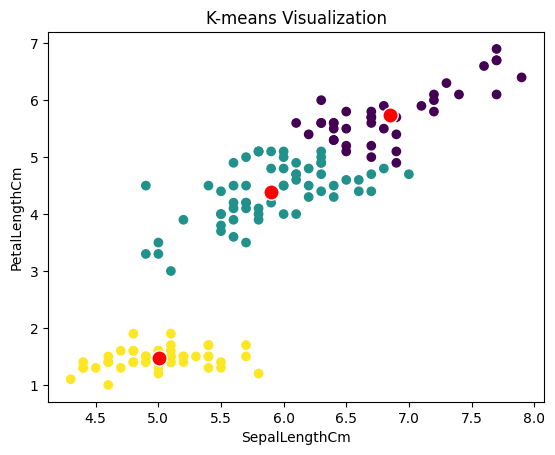

In [2]:
# ploting data points and clusters
centers_x = []
centers_y = []

for center in centers:
    centers_x.append(center[0])
    centers_y.append(center[2])

x = data1['SepalLengthCm']
y = data1['PetalLengthCm']

plt.scatter(x, y, c = lables)

plt.plot(centers_x, centers_y, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)

plt.title("K-means Visualization")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")



Text(0, 0.5, 'SICD')

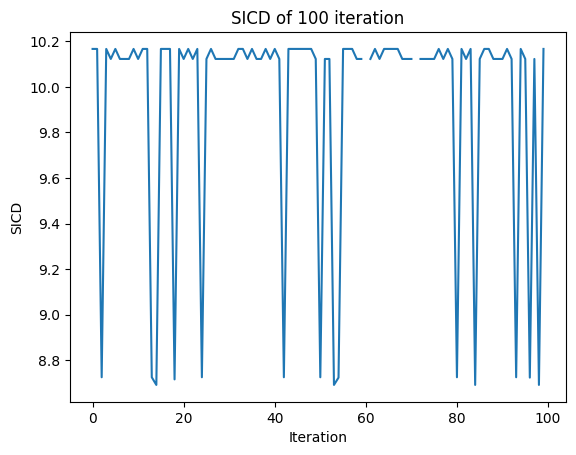

In [3]:
# SICD graph of 100 iteration
plt.plot(SICD)

plt.title("SICD of 100 iteration")
plt.xlabel("Iteration")
plt.ylabel("SICD")

Text(0, 0.5, 'Davies Bouldin Index ')

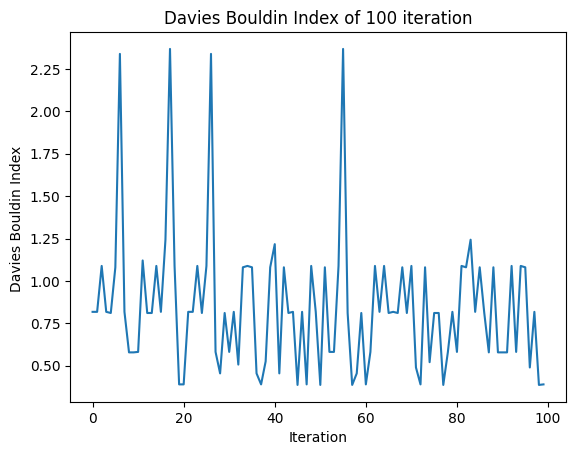

In [5]:
# Davies Bouldin Index graph of 100 iteration
plt.plot(DEVIES)

plt.title("Davies Bouldin Index of 100 iteration")
plt.xlabel("Iteration")
plt.ylabel("Davies Bouldin Index ")

Text(0, 0.5, 'DUNNE Index')

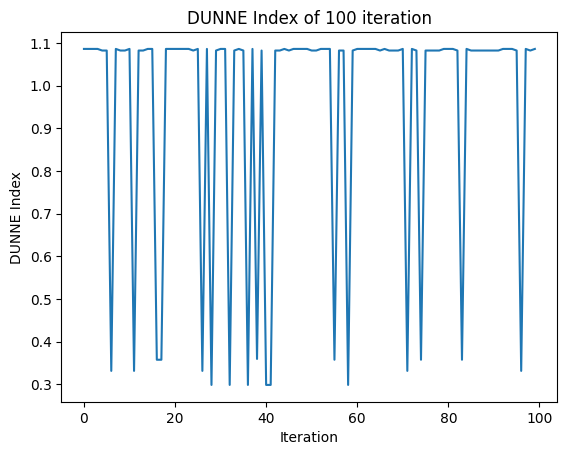

In [6]:
# Dunne Index graph of 100 iteration
plt.plot(DUNNE)

plt.title("DUNNE Index of 100 iteration")
plt.xlabel("Iteration")
plt.ylabel("DUNNE Index")

Text(0, 0.5, 'Silhouette Index')

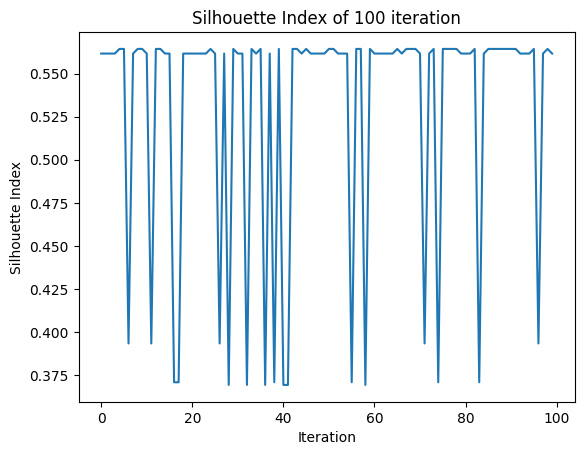

In [7]:
# Silhouette Index graph of 100 iteration
plt.plot(SIL)

plt.title("Silhouette Index of 100 iteration")
plt.xlabel("Iteration")
plt.ylabel("Silhouette Index")

Text(0, 0.5, 'Error')

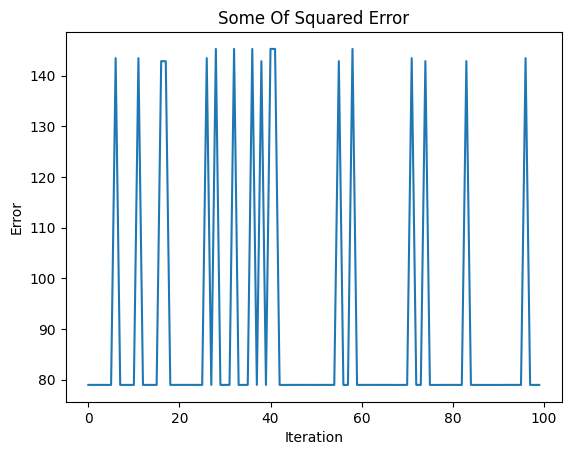

In [8]:
# ploting SSE valuse graph of 100 iteration of kmean
plt.plot(SSE)

plt.title("Some Of Squared Error")
plt.xlabel("Iteration")
plt.ylabel("Error")